## LEARNING HUMAN DRIVING BEHAVIOUR USING DEEP NEURAL NETWORKS AND IMPROVISING WITH DATA AUGMENTATION AND FILTERING



#### The main Objective of this project is to build an network that can analyse human driving pattern from a simple track and mimic the same in generalised situations. The idea was to get training data from track1, which is simple to drive, augment it with various types of filtering and image processing techniques to create a datgaset with high affinity to generalize and feed it to a neural network with steering angles as the labels for each image captured during recording. This is one of the best projects that i have made till date.

##### My point about self driving cars is that there is a high probability that a car can drive with only cameras mounted on it for real-time perception using probabilistic modelling, deep-neural networks, and lots of training.

#### In this project the network doesnot consider or remember the previous output that is the steering angle, but by using RNNs we can build a model with greater accuracy to drive on a lane but not at the center of the road as they do have memory.



I used keyboard and mouse as my main means of movement. 

One thing I was quite sure of, while doing this project is that validating the network is not a necessary task as the validation sets with comparibly higher loss were sometimes able to perform well than the others. This leads me to test all the models generated to test. The decision criteria was, if the model was not able to complete atleast one full lap in track1 with out any jerks or running away from tracks that model is considered to be part of result models set. 

### Python code for this project is broken to parts as listed below
1. Data acquisition and visualization from storage space 
2. Augmenting image data
  * Applying CLAHE to the image data set to equalize the contrast.
  * Cropping the image and rescaling it to the required proportional size.
  * Randomly applying shadows on a portion of the image.
  * Randomly shift the image up and down.
  * Including left and right camera images to the train data set by adding offset to the steering angle and performing the above     techinques on those images.
  * Applying gamma correction to the images.
  * Shearing and rotating a sub-sample of data.
  * Horizontally flipping images and negating the steering angles.
  * Randomly subsampling over the train data.
3. Creating a neural network model that optimises over the train data set collected.
4. Creating an object that keeps track of weights at the end of each epoch and training the network.
5. Choosing the right model weights by testing it on track1.
6. Finally testing the choosen model to work on a generalised track that is Track2.

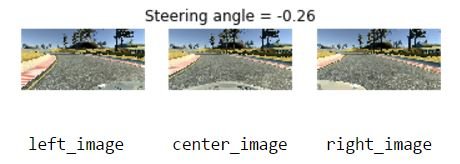

In [2]:
from IPython.display import Image as ipimag
ipimag(filename='images/sample.jpg')

The above plot is a sample of environment around the car that is captured in three views from cameras mounted at three different locations on the car. Road and pavements are the Region of interest which the network should concentrate on, but all the three views have unwanted objects in them, that is the trees, bushes, car hood. All the unwanted image portion can be removed by cropping the image in right proportions. 

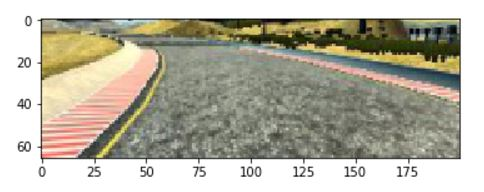

In [4]:
ipimag(filename='images/crop_reshape_image.jpg')

The above picture is the view from center camera and is cropped to have only required view of road.

But the whole point of collecting data from three different cameras is to recover as soon as possible if the car heads out of the road, as the side cameras capture good amount of data along the parallel plane of the car. So, the images from left camera are added into the train dataset with a shift in steering angle of 0.25 and from the right camera with a shift of -0.25.
These values are obtained by shifting the image from left camera image and rotating it to match appropriately along the road section with the center camera frame. The amount of rotation required was approximatley 10 degrees which was equivalent to a shift in angle ranging from 0.2 to 1 but I decided to use 0.25 as the shift angle. 0.25 was fixed because at the output of the network during run time i'm multyplying the steer angle by 2 inoder to recover faster from corner with high gain. 

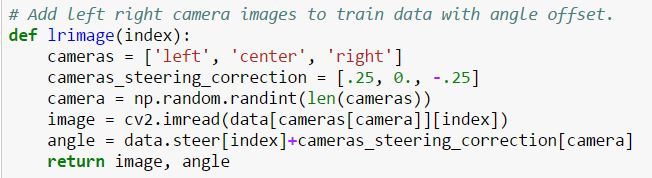

In [5]:
ipimag(filename= 'images/left_right_add.jpg')

##### Here comes the gist of the entire model adding shadows that helped the model to generalize from track one to any other given track. The idea of applying shadows on the image came when i was playing for fun on track two.
This pre-processing technique is quite essential as I wanted to take train data only from track one, but wantd the same to work even on track two which consisted of lot of blind turns, hair pin curves where the road is completely covered in shadows of hills and trees.

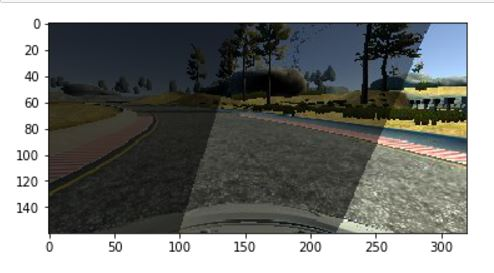

In [6]:
ipimag(filename='images/shadow.jpg')

But I feel that gamma correction on these images is neccesary as the brightness in the image is suddenly changing at certain places and the shadows applied are sharp. This method is randomly applied on a portion of images during training. This shows significant imporvement for identifying the borders of road

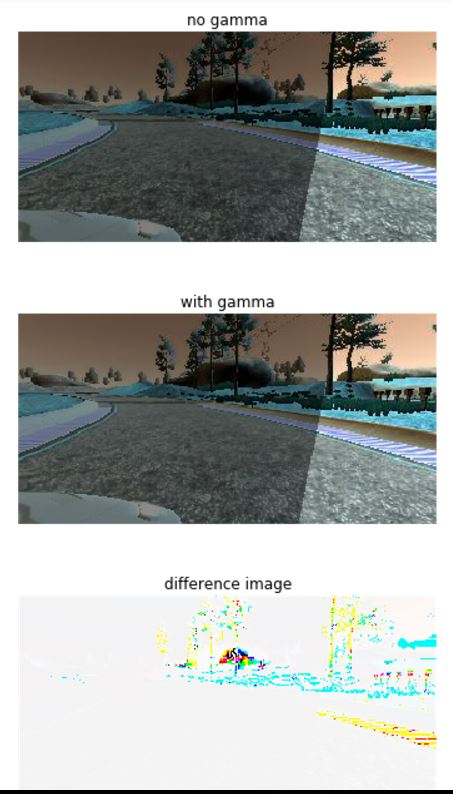

In [10]:
ipimag(filename='images/gamm_diff.jpg')

The next step involves shearing of image, this process is done randomly on a set of images mainly on the side view images. This method helps to distort the edges of images, which helps the network to decide on the output even at high speeds when the image gets distorted.

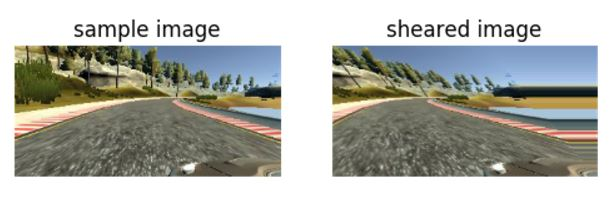

In [11]:
ipimag(filename='images/shear.jpg')

Flipping the images is essential pre-processing step as the images collected from track one have only left turns but to generalize we need images that have right turns also. So, half of the image data are flipped and steering angle is negated.
Flipping the data randomly also helps the model to recover form edges at a faster pace.

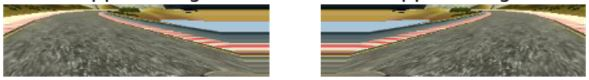

In [12]:
ipimag(filename='images/flip.jpg')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**---------------------------------------------------------------------------------------------------------------------------------**

# Model
The model that I have followed is NVIDIA drive model.

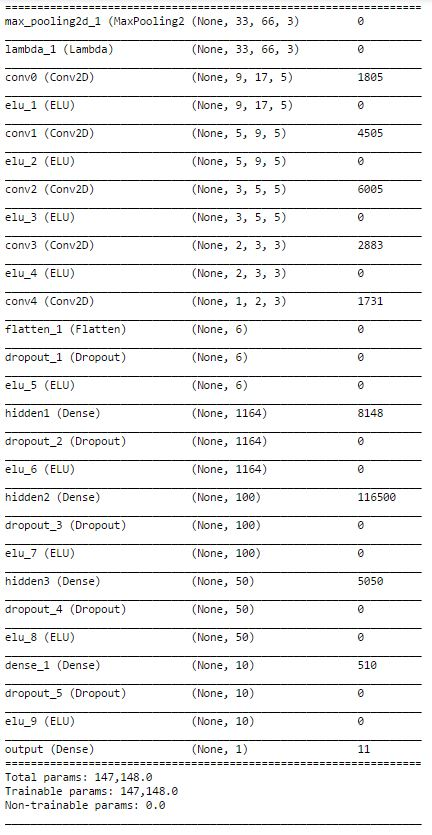

In [13]:
ipimag(filename='images/model.jpg')

A weight tracker is used along the way to keep track of the weights at each epoch. The best model is opted from one one of those epochs based on the validation loss, which did not have much affect during test time.

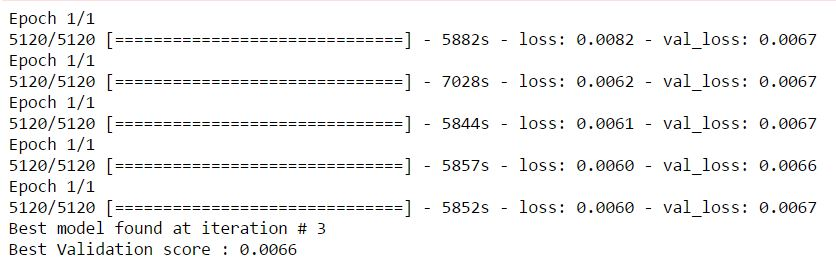

In [14]:
ipimag(filename='images/sol.jpg')

--------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------

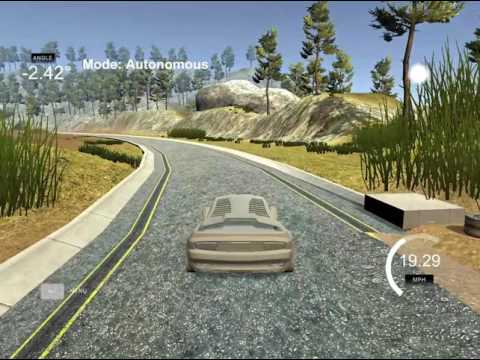

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('-XnEOL9RJ2o')

The above video is the test result of model on track one. The car judges very accuratley without bumping into sideways of the road, the car also recovers very quickly if it moves away from the center of the road as the stering output from the network is multiplied by a factor of two. 

---------------------------------------------------------------------------------------------------------------------------------

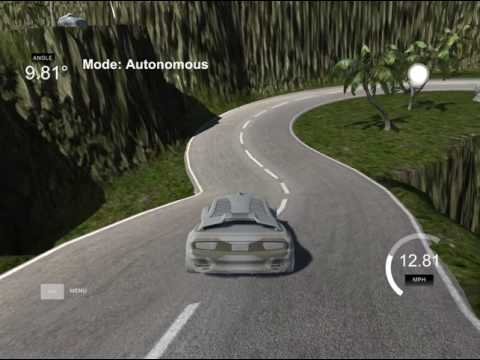

In [10]:
YouTubeVideo('tytpl-51GBI')

This is the test result of model on track two only considering training data from track one and pre-processing techniques excluding shearing and gamma and crooping only one-third from the top of the image. If the viseo is wathced completely it will be understood that the model has done a great job by generalizing till the point it got struck. The car got stuck near the one -tenth from the goal because of overlapping of two path ways in 2 dimensional visualization. This can be removed by cropping out a little more larger portion from the road and rescaling it.

---------------------------------------------------------------------------------------------------------------------------------------

In [9]:
YouTubeVideo('dTX2HpVYWNo')

By decreasing graphics and adding shearing and gamma correction to the pre-processing steps I was able to achieve driving the car on track two without any significant problems.  